# Spherical ICET

In [18]:
from vedo import *
import os
from ipyvtklink.viewer import ViewInteractiveWidget
import pykitti
import numpy as np
import tensorflow as tf
from tensorflow.math import sin, cos, tan
import tensorflow_probability as tfp

physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)
    
%load_ext autoreload
%autoreload 2
%autosave 180
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Autosaving every 180 seconds


In [13]:
from ICET_spherical import ICET

## init KITTI dataset -----------------------------------------------------------------
basedir = 'C:/kitti/'
date = '2011_09_26'
drive = '0005'
idx = 32
frame_range = range(150, 151, 1)
dataset = pykitti.raw(basedir, date, drive)
velo1 = dataset.get_velo(idx) # Each scan is a Nx4 array of [x,y,z,reflectance]
c1 = velo1[:,:3]
c1 = c1[c1[:,2] > -1.5] #ignore ground plane
velo2 = dataset.get_velo(idx+1) # Each scan is a Nx4 array of [x,y,z,reflectance]
c2 = velo2[:,:3]
c2 = c2[c2[:,2] > -1.5] #ignore ground plane
## ------------------------------------------------------------------------------------

#single distinct cluster
# c1 = np.random.randn(3000,3)*tf.constant([0.3,0.04,0.3]) + tf.constant([0.,4.,0.])
# c2 = np.random.randn(3000,3)*tf.constant([0.3,0.04,0.3]) + tf.constant([0.,4.,0.]) - np.array([0.1, 0.3, 0.0])
# c2 = c1 - np.array([0.1, 0.3, 0.0])

D = True
# D = False
X = tf.constant([0., 0., 0., 0., 0., 0.])
it = ICET(cloud1 = c1, cloud2 = c2,  fid = 30, draw = D, x0 = X, niter = 10)
ViewInteractiveWidget(it.plt.window)


 estimated solution vector X: 
 tf.Tensor([0. 0. 0. 0. 0. 0.], shape=(6,), dtype=float32)

 estimated solution vector X: 
 tf.Tensor([0.28767595 0.00721609 0.018637   0.00316928 0.00114844 0.00913336], shape=(6,), dtype=float32)

 estimated solution vector X: 
 tf.Tensor(
[ 3.26878577e-01  1.25723835e-02  1.81960966e-02  1.56415021e-03
 -3.26291542e-04  1.22613506e-02], shape=(6,), dtype=float32)

 estimated solution vector X: 
 tf.Tensor([ 0.33059928  0.01154899  0.01717802  0.00109777 -0.0006964   0.01281491], shape=(6,), dtype=float32)

 estimated solution vector X: 
 tf.Tensor([ 0.33129555  0.00854757  0.01645963  0.00104298 -0.00070895  0.0130357 ], shape=(6,), dtype=float32)

 estimated solution vector X: 
 tf.Tensor([ 0.33155933  0.0075936   0.01615603  0.00100828 -0.00068026  0.0131082 ], shape=(6,), dtype=float32)

 estimated solution vector X: 
 tf.Tensor([ 0.3319228   0.00751665  0.01547693  0.00095934 -0.00069322  0.01314614], shape=(6,), dtype=float32)

 estimated solutio

ViewInteractiveWidget(height=960, layout=Layout(height='auto', width='100%'), width=960)

## Plot results of ICET estimates on KITTI lidar point clouds vs GPS/INS baseline

<IPython.core.display.Javascript object>


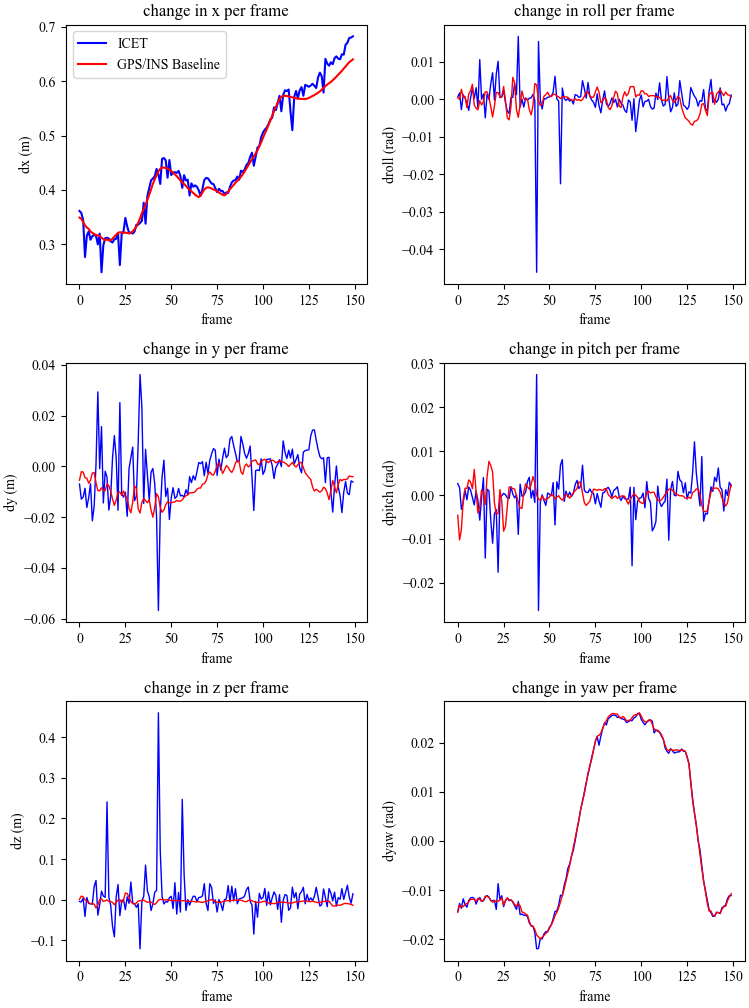

In [71]:
import matplotlib.pyplot as plt
font = {'fontname':'Times New Roman'}

OXTS_baseline = np.loadtxt("OXTS_baseline.txt")
ICET_estimates = np.loadtxt("ICET_estimates.txt")

OXTS_baseline[:,3:] = OXTS_baseline[:,3:]/0.1*0.1037

#fix sign errors
ICET_estimates[:,1] = -ICET_estimates[:,1]
ICET_estimates[:,3:] = -ICET_estimates[:,3:]
style1 = 'b-'
style2 = 'r-'

fig, ax = plt.subplots(3,2, constrained_layout = True)
ax[0,0].plot(ICET_estimates[:,0], style1, label = 'ICET')
ax[0,0].plot(OXTS_baseline[:,0], style2, label = 'GPS/INS Baseline')
# ax[0,0].plot(np.arange(n//2, np.shape(ICET_estimates)[0] - n//2 ), moving_avg(OXTS_baseline[:,0], n),  style2, label = 'GPS/INS Baseline')
# ax[0,0].plot(np.arange(n//2, np.shape(ICET_estimates)[0] - n//2 ), moving_avg(ICET_estimates[:,0], n),  style1, label = 'GPS/INS Baseline')
ax[0,0].set_title("change in x per frame", **font)
ax[0,0].set_ylabel("dx (m)", **font)
ax[0,0].legend(loc = 'upper left')
ax[0,0].set_xlabel("frame", **font)

ax[1,0].plot(ICET_estimates[:,1], style1, lw = 1)
ax[1,0].plot(-OXTS_baseline[:,1], style2, lw = 1)
# ax[1,0].plot(np.arange(n//2, np.shape(ICET_estimates)[0] - n//2 ), moving_avg(OXTS_baseline[:,1], n),  style2, lw = 1)
ax[1,0].set_title("change in y per frame", **font)
ax[1,0].set_ylabel("dy (m)", **font)
ax[1,0].set_xlabel("frame", **font)


ax[2,0].plot(ICET_estimates[:,2], style1, lw = 1)
ax[2,0].plot(OXTS_baseline[:,2], style2, lw = 1)
# ax[2,0].plot(np.arange(n//2, np.shape(ICET_estimates)[0] - n//2 ), moving_avg(OXTS_baseline[:,2], n),  style2, lw = 1)
ax[2,0].set_title("change in z per frame", **font)
ax[2,0].set_ylabel("dz (m)", **font)
ax[2,0].set_xlabel("frame", **font)

ax[0,1].plot(ICET_estimates[:,3], style1, lw = 1)
ax[0,1].plot(OXTS_baseline[:,3], style2, lw = 1)
ax[0,1].set_title("change in roll per frame", **font)
ax[0,1].set_ylabel("droll (rad)", **font)
ax[0,1].set_xlabel("frame", **font)


ax[1,1].plot(ICET_estimates[:,4], style1, lw = 1)
ax[1,1].plot(OXTS_baseline[:,4], style2, lw = 1)
ax[1,1].set_title("change in pitch per frame", **font)
ax[1,1].set_ylabel("dpitch (rad)", **font)
ax[1,1].set_xlabel("frame", **font)


ax[2,1].plot(ICET_estimates[:,5], style1, lw = 1)
ax[2,1].plot(OXTS_baseline[:,5], style2, lw = 1)
ax[2,1].set_title("change in yaw per frame", **font)
ax[2,1].set_ylabel("dyaw (rad)", **font)
ax[2,1].set_xlabel("frame", **font)

# fig.tight_layout(h_pad = 0.1)
plt.show()

<IPython.core.display.Javascript object>


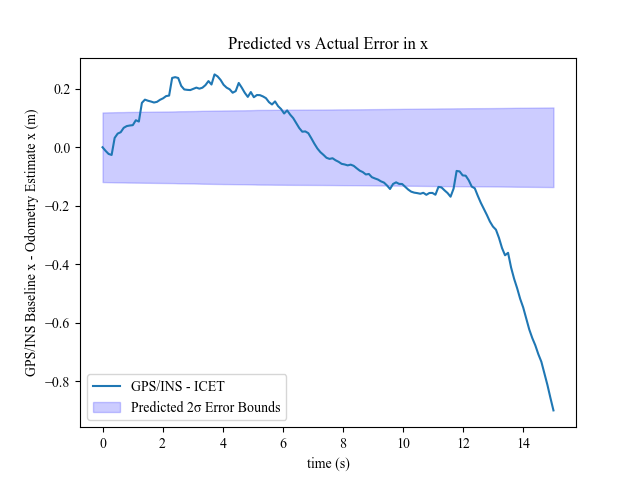

Text(0, 0.5, 'GPS/INS Baseline x - Odometry Estimate x (m)')

In [83]:
#plot error between ICET and absolute position
plt.rc('font',family='Times New Roman')
fig3, ax3 = plt.subplots(1,1)

ICET_pred_stds = np.loadtxt("ICET_pred_stds.txt")

#which component to look at
# c = 5 #yaw
c = 0 # x (forward movement)

diffx = OXTS_baseline[:,c] - ICET_estimates[:,c]
    
#flip sign when looking at yaw
if c ==5:
    diffx = -diffx 
    
cum_err = np.zeros(np.shape(ICET_pred_stds))
cum_diffx = np.zeros(np.shape(diffx))

for i in range(np.shape(ICET_pred_stds)[0]):
    cum_err[i,:] = np.sum(ICET_pred_stds[:i,:]**2, axis = 0)
    #add in baseline OXTS 1-sigma errors
    cum_err[i,:] += np.sqrt(2)*np.array([0.05,0.05,0.1,0.0005,0.0005,0.001])**2
    cum_err[i,:] = np.sqrt(cum_err[i,:]) 
    
for j in range(np.shape(diffx)[0]):
    cum_diffx[j] = np.sum(diffx[:j]) 

# #old (error for each individual timestep)------------------------
# ax3.plot(diffx, label = 'GPS/INS - ICET')
# ax3.fill_between(np.linspace(0,150,np.shape(ICET_pred_stds)[0]), -2*ICET_pred_stds[:,c], 2*ICET_pred_stds[:,c], 
#                  color = (0,0,1,0.2), label = 'ICET Predicted 2σ Error Bounds')
# #-------------------------------------------------------------------

# #new (accumulated differences in error)--------------------------
# ax3.plot(np.linspace(0,15,np.shape(ICET_pred_stds)[0]), cum_diffx_with_ground, label = 'GPS/INS - ICET')
ax3.plot(np.linspace(0,15,np.shape(ICET_pred_stds)[0]), cum_diffx, label = 'GPS/INS - ICET')
ax3.fill_between(np.linspace(0,15,np.shape(ICET_pred_stds)[0]), -2*cum_err[:,c], 2*cum_err[:,c], 
                 color = (0,0,1,0.2), label = 'Predicted 2σ Error Bounds')
#--------------------------------------------------------------------

ax3.legend(loc = 'lower left')
ax3.set_title("Predicted vs Actual Error in x")
ax3.set_xlabel("time (s)", **font)
ax3.set_ylabel("GPS/INS Baseline x - Odometry Estimate x (m)", **font)
# ax3.set_ylim([-0.07,0.07])

In [51]:
#get true transformation between frames
from metpy.calc import lat_lon_grid_deltas
poses0 = dataset.oxts[idx] #<- ID of 1st scan
poses1 = dataset.oxts[idx+1] #<- ID of 2nd scan
lat0 = poses0.packet.lat
lon0 = poses0.packet.lon
alt0 = poses0.packet.alt
lat1 = poses1.packet.lat
lon1 = poses1.packet.lon
alt1 = poses1.packet.alt

dx_oxts, dy_oxts = lat_lon_grid_deltas(np.array([lon0,lon1]), np.array([lat0, lat1]))
# print(dx_oxts, dy_oxts) 
dx_oxts = dx_oxts[0,0].magnitude
dy_oxts = dy_oxts[0,0].magnitude
dz_oxts = (alt0-alt1)
droll_oxts = (poses0.packet.roll - poses1.packet.roll)
dpitch_oxts = (poses0.packet.pitch - poses1.packet.pitch)
dyaw_oxts = (poses0.packet.yaw - poses1.packet.yaw)

rot = poses1.T_w_imu[:3,:3] #trying this

dxyz_oxts = np.array([[dx_oxts, dy_oxts, dz_oxts]])
dxyz_lidar = dxyz_oxts.dot(rot)
print(dxyz_lidar)

dt = 0.10
from_vel = np.array([[poses1.packet.vf*dt, poses1.packet.vl*dt, poses1.packet.vu*dt, -poses1.packet.wf*dt, -poses1.packet.wl*dt, -poses1.packet.wu*dt]])
print(from_vel)


[[ 0.34139423 -0.01908924  0.00477714]]
[[ 3.39310012e-01  1.68285566e-02 -3.29665402e-03 -2.61118108e-03
  -1.18737389e-04 -1.28063700e-02]]


In [15]:
print(it.X)
print(it.pred_stds)
print(it.Q)

tf.Tensor([ 0.3318329   0.00716314  0.01495673  0.00093478 -0.00069705  0.01315395], shape=(6,), dtype=float32)
tf.Tensor([0.0019155  0.0031818  0.00338515 0.00037534 0.00034845 0.00021259], shape=(6,), dtype=float32)
tf.Tensor(
[[ 3.66913309e-06  2.40644590e-06 -3.04225978e-09 -2.44294771e-08
   1.15081043e-07  8.36348022e-08]
 [ 2.40648569e-06  1.01238647e-05  3.59064209e-08 -8.35934415e-08
   4.21867661e-08 -1.83693800e-07]
 [-3.04775272e-09  3.59150008e-08  1.14592185e-05  1.67267970e-07
  -7.64244135e-09  5.67618130e-09]
 [-2.44299052e-08 -8.35936191e-08  1.67267942e-07  1.40883728e-07
  -1.07866658e-08 -1.66822089e-09]
 [ 1.15081072e-07  4.21872883e-08 -7.64080355e-09 -1.07866516e-08
   1.21417600e-07 -1.53601443e-09]
 [ 8.36345322e-08 -1.83692123e-07  5.67608449e-09 -1.66824310e-09
  -1.53599400e-09  4.51956943e-08]], shape=(6, 6), dtype=float32)


In [ ]:
#test where points are inside spherical cell...
# print(it.cloud1_tensor_spherical)
maxtheta = tf.constant([[0.2],[0.7]])
maxr = tf.constant([[0.5],[2.]])

ans1 = tf.greater(it.cloud1_tensor_spherical[:,1], maxtheta)
# print(ans1)
ans2 = tf.less(it.cloud1_tensor_spherical[:,0], maxr)
# print(ans2)
combined = tf.Variable([ans1, ans2])
# print(combined)
ans3 = tf.math.reduce_all(combined, axis = 1)

print(ans3)

In [ ]:
#duplicate each element of an n*1 vector 3 times
t = tf.linspace(0,5,6)[:,None]
print(t)

test  = tf.tile(t, [3,1])
# print(test)
test2 = tf.reshape(tf.transpose(tf.reshape(test, [3,-1])), [-1,1])
print(test2)
test3 = tf.reshape(tf.transpose(tf.reshape(test, [3,-1])), [-1,3])
print(test3)